In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('10100125.csv')

In [3]:
df.head()

,REF_DATE,GEO,DGUID,Toronto Stock Exchange Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1956-01,Canada,2016A000011124,Standard and Poor's/Toronto Stock Exchange Com...,"Index, 2000=1000",176,units,0,v122620,1.3,525.63,NaN,NaN,NaN,2
1,1956-01,Canada,2016A000011124,"Toronto Stock Exchange, oil and gas, closing q...","Index, 2000=1000",176,units,0,v122621,1.4,485.02,NaN,NaN,t,2
2,1956-01,Canada,2016A000011124,"Toronto Stock Exchange, metals and minerals, c...","Index, 2000=1000",176,units,0,v122622,1.5,729.73,NaN,NaN,t,2
3,1956-01,Canada,2016A000011124,"Toronto Stock Exchange, utilities, closing quo...","Index, 2000=1000",176,units,0,v122623,1.6,914.11,NaN,NaN,t,2
4,1956-01,Canada,2016A000011124,"Toronto Stock Exchange, paper and forest produ...","Index, 2000=1000",176,units,0,v122624,1.7,1013.23,NaN,NaN,t,2


In [4]:
df = df.loc[df['Toronto Stock Exchange Statistics'] == 'Standard and Poor\'s/Toronto Stock Exchange Composite Index, close']

In [5]:
df.head()

,REF_DATE,GEO,DGUID,Toronto Stock Exchange Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1956-01,Canada,2016A000011124,Standard and Poor's/Toronto Stock Exchange Com...,"Index, 2000=1000",176,units,0,v122620,1.3,525.63,NaN,NaN,NaN,2
10,1956-02,Canada,2016A000011124,Standard and Poor's/Toronto Stock Exchange Com...,"Index, 2000=1000",176,units,0,v122620,1.3,545.15,NaN,NaN,NaN,2
20,1956-03,Canada,2016A000011124,Standard and Poor's/Toronto Stock Exchange Com...,"Index, 2000=1000",176,units,0,v122620,1.3,588.91,NaN,NaN,NaN,2
30,1956-04,Canada,2016A000011124,Standard and Poor's/Toronto Stock Exchange Com...,"Index, 2000=1000",176,units,0,v122620,1.3,583.61,NaN,NaN,NaN,2
40,1956-05,Canada,2016A000011124,Standard and Poor's/Toronto Stock Exchange Com...,"Index, 2000=1000",176,units,0,v122620,1.3,560.09,NaN,NaN,NaN,2


In [6]:
df = df[['REF_DATE', 'VALUE']]

In [7]:
df.head()

,REF_DATE,VALUE
0,1956-01,525.63
10,1956-02,545.15
20,1956-03,588.91
30,1956-04,583.61
40,1956-05,560.09


In [9]:
Y = df['VALUE']
date = df['REF_DATE']
date = np.array(date,dtype=np.datetime64)
Series = pd.DataFrame(Y)
Series = Series.set_index(date)
Series.head()

,VALUE
1956-01-01,525.63
1956-02-01,545.15
1956-03-01,588.91
1956-04-01,583.61
1956-05-01,560.09


In [10]:
df['year']= pd.DatetimeIndex(df['REF_DATE']).year

In [11]:
df.head()

,REF_DATE,VALUE,year
0,1956-01,525.63,1956
10,1956-02,545.15,1956
20,1956-03,588.91,1956
30,1956-04,583.61,1956
40,1956-05,560.09,1956


In [12]:
df.drop(['REF_DATE'], axis = 1)

,VALUE,year
0,525.63,1956
10,545.15,1956
20,588.91,1956
30,583.61,1956
40,560.09,1956
...,...,...
11066,20582.94,2021
11080,20070.30,2021
11094,21037.10,2021
11108,20660.00,2021


In [13]:
df = df[['year', 'VALUE']]

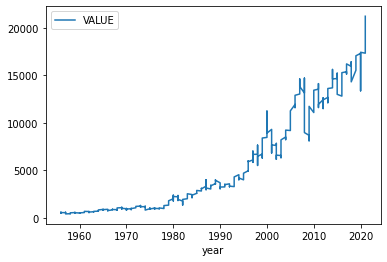

In [14]:
df.plot(x='year',y='VALUE')


In [15]:
df.describe()

,year,VALUE
count,792.00000,792.000000
mean,1988.50000,5636.448270
std,19.06241,5434.998279
min,1956.00000,432.110000
25%,1972.00000,1005.252500
50%,1988.50000,3353.000000
75%,2005.00000,9646.757500
max,2021.00000,21223.000000


In [34]:
training_set = df.iloc[:, 1:2].values

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

(792, 1)


In [36]:
stock_data_len = df['VALUE'].count()
print(stock_data_len)

792


In [37]:
features = []
labels = []
for i in range(60, stock_data_len):
    features.append(training_set_scaled[i-60:i, 0])
    labels.append(training_set_scaled[i,0])

features = np.array(features)
labels = np.array(labels)

features = np.reshape(features, (features.shape[0], features.shape[1], 1))

In [38]:
print(labels)

[0.00690158 0.00780582 0.008345   0.00968357 0.01029201 0.0105123
 0.01107408 0.01155939 0.01103801 0.01122655 0.01219669 0.01292585
 0.01205913 0.01225056 0.01221208 0.01132419 0.00867207 0.00675055
 0.00740565 0.00808864 0.00672073 0.00714688 0.0093339  0.00946953
 0.01095576 0.00992454 0.01084177 0.01236647 0.01290469 0.0116551
 0.01078405 0.01099568 0.01195283 0.01221304 0.01188213 0.01301532
 0.01391619 0.01362376 0.01496232 0.01627395 0.01755721 0.01748458
 0.0183566  0.01811996 0.01979136 0.01993902 0.02010448 0.02026945
 0.02257191 0.02238192 0.02200146 0.02304615 0.02294274 0.01996018
 0.01954269 0.0205287  0.0212242  0.02196876 0.02076102 0.02159744
 0.02335831 0.02227418 0.02168835 0.02208227 0.02066434 0.02043347
 0.01975192 0.01675109 0.01582424 0.01653513 0.01628838 0.01719022
 0.01978415 0.02016845 0.0215402  0.02241559 0.02080094 0.02187497
 0.02324768 0.02272774 0.02358677 0.0209967  0.02205678 0.02246609
 0.02123574 0.01939407 0.01840614 0.0219019  0.02149836 0.023725

In [39]:
print(features)

[[[0.00449812]
  [0.005437  ]
  [0.00754176]
  ...
  [0.00327499]
  [0.00419992]
  [0.00541728]]

 [[0.005437  ]
  [0.00754176]
  [0.00728685]
  ...
  [0.00419992]
  [0.00541728]
  [0.00690158]]

 [[0.00754176]
  [0.00728685]
  [0.00615558]
  ...
  [0.00541728]
  [0.00690158]
  [0.00780582]]

 ...

 [[0.69045433]
  [0.70467113]
  [0.71451871]
  ...
  [0.95501876]
  [0.9692144 ]
  [0.94455745]]

 [[0.70467113]
  [0.71451871]
  [0.71925011]
  ...
  [0.9692144 ]
  [0.94455745]
  [0.99105858]]

 [[0.71451871]
  [0.71925011]
  [0.71988886]
  ...
  [0.94455745]
  [0.99105858]
  [0.97292083]]]


In [40]:
print(features.shape)

(732, 60, 1)


In [41]:
import tensorflow as tf

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (features.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1)
])

In [43]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

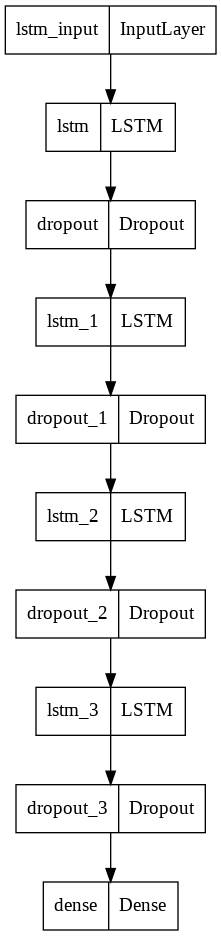

In [44]:
tf.keras.utils.plot_model(model)

In [45]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [46]:
from time import time
start = time()
history = model.fit(features, labels, epochs = 20, batch_size = 32, verbose = 1)
end = time()

Epoch 1/20
23/23 [==============================] - 12s 61ms/step - loss: 0.0315
Epoch 2/20
23/23 [==============================] - 1s 61ms/step - loss: 0.0051
Epoch 3/20
23/23 [==============================] - 1s 62ms/step - loss: 0.0047
Epoch 4/20
23/23 [==============================] - 1s 61ms/step - loss: 0.0041
Epoch 5/20
23/23 [==============================] - 1s 62ms/step - loss: 0.0047
Epoch 6/20
23/23 [==============================] - 1s 61ms/step - loss: 0.0038
Epoch 7/20
23/23 [==============================] - 1s 60ms/step - loss: 0.0041
Epoch 8/20
23/23 [==============================] - 1s 61ms/step - loss: 0.0039
Epoch 9/20
23/23 [==============================] - 1s 61ms/step - loss: 0.0038
Epoch 10/20
23/23 [==============================] - 1s 61ms/step - loss: 0.0038
Epoch 11/20
23/23 [==============================] - 1s 61ms/step - loss: 0.0038
Epoch 12/20
23/23 [==============================] - 1s 60ms/step - loss: 0.0043
Epoch 13/20
23/23 [=================

In [47]:
print('Total training time {} seconds'.format(end - start))

Total training time 38.753117084503174 seconds


In [48]:
print(features.shape)

(732, 60, 1)


In [57]:
test_data = df.iloc[:60, 1:2].values

In [58]:
print(test_data.shape)

(60, 1)


In [59]:
test_predicted = model.predict(test_data)

In [61]:
test_inverse_predicted = sc.inverse_transform(test_predicted)

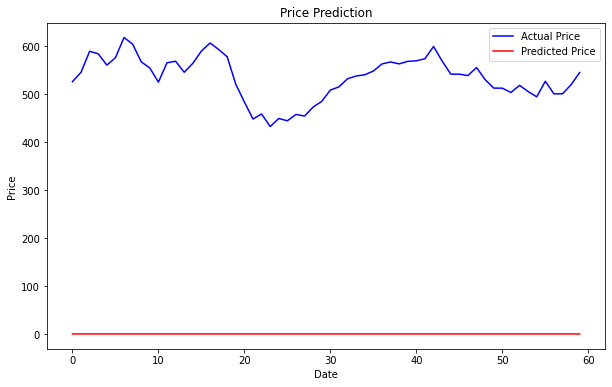

In [64]:
plt.figure(figsize=(10,6))  
plt.plot(test_stock_data_processed, color='blue', label='Actual Price')  
plt.plot(test_predicted , color='red', label='Predicted Price')  
plt.title('Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Price')  
plt.legend()  
plt.show()  